In [2]:
!pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/b7/f8/32d6b5aa4c4bc045fa2c4c58f88c325facc54721956c6313f0afea8ea853/pandas-2.1.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for numpy>=1.23.2 from https://files.pythonhosted.org/packages/72/b2/02770e60c4e2f7e158d923ab0dea4e9f146a2dbf267fec6d8dc61d475689/numpy-1.25.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/502.3 kB ? eta -:--:--
     -- ------------------------------------- 30.7/502.3 kB ? eta -:--:--
     -------- ----------------------------- 112.6/502.3 kB 1.7 MB/s eta 0:00:01
     -------------- ----------------------- 194.6/502.3 kB 1.5 MB/s eta 0:00:01
     -------------- ----------------------- 194.6/502.3 kB 1.5 MB/s eta 0:00:01
     -------------- ----------------------- 194.6/502.3 kB 1.5 MB/s eta 0:00:01
     ------------------------ ------------- 327.7/502.3 kB 1.2 MB/s eta 0:00:01
     ------------------------ ----

In [3]:
"""
import time

from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select

options = Options()
driver = webdriver.Chrome("C:\Program Files\chromedriver_linux64")
download_url = 'https://www.boatrace.jp/owpc/pc/extra/data/download.html'
driver.get(download_url)
time.sleep(7)
html = driver.page_source
soup = BeautifulSoup(html, "lxml")
datas = soup.find('ul', attrs={'class':'data_list h-mt15'})
datas_url = datas.find_all('a')
for data_url in datas_url:
    home_url = 'https://www.boatrace.jp'
    data_url = home_url + data_url.get('href')
    driver.get(data_url)
    time.sleep(5)
driver.close()
"""

NoSuchDriverException: Message: Unable to obtain chromedriver using Selenium Manager; 'str' object has no attribute 'capabilities'; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors/driver_location


In [7]:
"""
import time
from selenium import webdriver #Selenium Webdriverをインポートする
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service

# Serviceオブジェクトを作成
service = Service(ChromeDriverManager().install())

# Serviceオブジェクトを使用してWebDriverを作成
options = Options()
driver = webdriver.Chrome(service=service, options=options)

hall_pref="大阪府"
hall_name="123N+松原"

hp_url=f"https://ana-slo.com/ホールデータ/{hall_pref}/"

time.sleep(5) #5秒待つ。冒頭のimport timeで利用可能なtimeメソッド

search_box = driver.find_element_by_name("q") #DOM操作
 
search_box.send_keys('NakamuraBlog') #Google検索ボックス内に「NakamuraBlog」と入力
search_box.submit() #Google検索ボタンのクリック 
 
time.sleep(5) #5秒待つ。冒頭のimport timeで利用可能なtimeメソッド
 
research_result = driver.find_element_by_partial_link_text("nkmrdai") #検索結果hrefタグ内に「nkmradai」があるリンクを探す
research_result.click() #クリックする。 #このタイミングでNakamuraBlogのトップページが開かれたらOK
 
time.sleep(5) #5秒待つ。冒頭のimport timeで利用可能なtimeメソッド
 
driver.quit() #Chromeブラウザを閉じる
"""

Exception: No such driver version 115.0.5790.110 for win32

## アナスロデータ収集

### 単体

In [57]:
from datetime import datetime
from urllib.request import urlopen
import random
import csv
import requests
from bs4 import BeautifulSoup
import time
import re
import pandas as pd

# チェリー狙いでのブドウ確率を計算


def calc_grape(game_num, big_num, reg_num, diffrent_piece, model_num):
    # ゲーム数 ビッグ回数 レギュラー回数 差枚数  機種ナンバー
    try:
        if model_num == 1:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*251.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.06068))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*251.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.06068))))/8)*2)
        elif model_num == 2:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.05847))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.05847))))/8)*2)
        elif model_num == 3:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.0603))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.0603))))/8)*2)
        elif model_num == 4:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.7)+(reg_num*95.7)+(game_num*0.411)+(game_num*0.1087))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.7)+(reg_num*95.7)+(game_num*0.411)+(game_num*0.1087))))/8)*2)
    except:
        return 0


shop_pref = "県"
shop_name = "123南昭和店"
# 正規表現パターンを定義
pattern = r'\([^)]*\)'

try:
    # 日付を取得するための対象URL
    url = f'https://ana-slo.com/ホールデータ/{shop_pref}/{shop_name}-データ一覧'
    # ウェブページをダウンロード
    response = requests.get(url)

    # ページのコンテンツをBeautiful Soupで解析
    soup = BeautifulSoup(response.text, 'html.parser')
    wait_time = random.uniform(3, 5)
    time.sleep(wait_time)

    div_element = soup.find('div', class_="date-list-area")
    a_elements = div_element.findAll("a")
    days_list = []
    # ここで何日分集めるか指定
    for a_element in a_elements[0:190]:
        days_list.append(a_element.text)
    print(days_list)

    # 入力形式を指定
    input_format = "%Y/%m/%d"
    # 出力形式を指定
    output_format = "%Y-%m-%d"

    column_names = ["日付", "機種名", "台番号", "G数", "差枚", "BB回数",
                    "RB回数", "合成確率", "BB確率", "RB確率", "ブドウ確率"]  # 列名を指定するリストを作成
    df = pd.DataFrame(columns=column_names)
    for day_with_day_of_week in days_list:
        # 正規表現パターンに一致する部分を削除
        print(day_with_day_of_week)
        day = re.sub(pattern, '', day_with_day_of_week)
        # 日付文字列をdatetimeオブジェクトに変換
        date_object = datetime.strptime(day, input_format)
        # 新しい形式で日付を文字列に変換
        output_date_str = date_object.strftime(output_format)

        # スクレイピング対象のURL
        url = f'https://ana-slo.com/{output_date_str}-{shop_name}-data/'
        # ウェブページをダウンロード
        response = requests.get(url)

        # ページのコンテンツをBeautiful Soupで解析
        soup = BeautifulSoup(response.text, 'html.parser')

        wait_time = random.uniform(3, 5)
        time.sleep(wait_time)

        # アイムジャグラーのh4タグのテキストを検索
        h4_text_im = "アイムジャグラーEX-TP"
        h4_element = soup.find('h4', string=h4_text_im)
        if h4_element is not None:
            # h4タグの次の要素（ulタグ）を検索
            ul_element = h4_element.find_next_sibling()
            # ulタグの次の要素（divタグ）を検索
            div_element = ul_element.find_next_sibling()
            # テーブルを指定
            table = div_element.find("table")
            print(shop_name)
            im_rows = table.findAll("tr")
            # 最後の要素を削除
            del im_rows[-1]
        # マイジャグラーのh4タグのテキストを検索
        h4_text_my = "マイジャグラーV"
        h4_element = soup.find('h4', string=h4_text_my)
        my_rows = []
        if h4_element is not None:
            # h4タグの次の要素（ulタグ）を検索
            ul_element = h4_element.find_next_sibling()
            # ulタグの次の要素（divタグ）を検索
            div_element = ul_element.find_next_sibling()
            # テーブルを指定
            table = div_element.find("table")
            my_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del my_rows[0]
            del my_rows[-1]

        # ファンキージャグラーのh4タグのテキストを検索
        h4_text_fanky = "ファンキージャグラー2"
        h4_element = soup.find('h4', string=h4_text_fanky)
        fanky_rows = []
        if h4_element is not None:
            # h4タグの次の要素（ulタグ）を検索
            ul_element = h4_element.find_next_sibling()
            # ulタグの次の要素（divタグ）を検索
            div_element = ul_element.find_next_sibling()
            # テーブルを指定
            table = div_element.find("table")
            fanky_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del fanky_rows[0]
            del fanky_rows[-1]

        # ハッピージャグラーのh4タグのテキストを検索
        h4_text_happy = "ハッピージャグラーVIII"
        h4_element = soup.find('h4', string=h4_text_happy)
        happy_rows = []
        if h4_element is not None:
            # h4タグの次の要素（ulタグ）を検索
            ul_element = h4_element.find_next_sibling()
            # ulタグの次の要素（divタグ）を検索
            div_element = ul_element.find_next_sibling()
            # テーブルを指定
            table = div_element.find("table")
            happy_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del happy_rows[0]
            del happy_rows[-1]

        for row in im_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            if csvRow[0] == "台番号":
                pass
            else:
                if len(csvRow) == 10:
                    # 6個目のARTと10個目のART確率を削除
                    del csvRow[5]
                    del csvRow[8]
                elif len(csvRow) < 7:
                    break
                csvRow.insert(0, date_object)
                csvRow.insert(1, f"アイムジャグラーEX-TP")
                for i in range(5):
                    csvRow[i+2] = csvRow[i+2].replace(',', '')
                    csvRow[i+2] = csvRow[i+2].replace('+', '')
                    csvRow[i+2] = int(csvRow[i+2])
                csvRow.append(calc_grape(
                    csvRow[3], csvRow[5], csvRow[6], csvRow[4], 1))
                df.loc[len(df)] = csvRow

        for row in my_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            if len(csvRow) == 10:
                # 6個目のARTと10個目のART確率を削除
                del csvRow[5]
                del csvRow[8]
            elif len(csvRow) < 7:
                break

            csvRow.insert(0, date_object)
            csvRow.insert(1, f"マイジャグラーV")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(
                csvRow[3], csvRow[5], csvRow[6], csvRow[4], 2))
            df.loc[len(df)] = csvRow

        for row in fanky_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            if len(csvRow) == 10:
                # 6個目のARTと10個目のART確率を削除
                del csvRow[5]
                del csvRow[8]
            elif len(csvRow) < 7:
                break
            csvRow.insert(0, date_object)
            csvRow.insert(1, f"ファンキージャグラー2")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(
                csvRow[3], csvRow[5], csvRow[6], csvRow[4], 3))
            df.loc[len(df)] = csvRow

        for row in happy_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            if len(csvRow) == 10:
                # 6個目のARTと10個目のART確率を削除
                del csvRow[5]
                del csvRow[8]
            elif len(csvRow) < 7:
                break
            csvRow.insert(0, date_object)
            csvRow.insert(1, f"ハッピージャグラーVIII")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(
                csvRow[3], csvRow[5], csvRow[6], csvRow[4], 4))
            df.loc[len(df)] = csvRow

    df.to_csv(f"{shop_name}.csv", index=False, encoding="shift-jis")
    print("終了")
except Exception as e:
    df.to_csv(f"{shop_name}.csv", index=False, encoding="shift-jis")
    print(e)
    print(f"{shop_name}、異常終了")
    pass


NameError: name 'df' is not defined

In [ ]:
from datetime import datetime
from urllib.request import urlopen
import random
import csv
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import re
import os

# チェリー狙いでのブドウ確率を計算


def calc_grape(game_num, big_num, reg_num, diffrent_piece, model_num):
    # ゲーム数 ビッグ回数 レギュラー回数 差枚数  機種ナンバー
    try:
        if model_num == 1:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*251.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.06068))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*251.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.06068))))/8)*2)
        elif model_num == 2:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.05847))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.05847))))/8)*2)
        elif model_num == 3:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.0603))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.0603))))/8)*2)
        elif model_num == 4:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.7)+(reg_num*95.7)+(game_num*0.411)+(game_num*0.1087))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.7)+(reg_num*95.7)+(game_num*0.411)+(game_num*0.1087))))/8)*2)
    except:
        return 0


# 正規表現パターンを定義
pattern = r'\([^)]*\)'
shop_pref = "兵庫県"
get_shop_url = f"https://ana-slo.com/ホールデータ/{shop_pref}/"
# ウェブページをダウンロード
response = requests.get(get_shop_url)
# ページのコンテンツをBeautiful Soupで解析
soup = BeautifulSoup(response.text, 'html.parser')
wait_time = random.uniform(3, 5)
time.sleep(wait_time)

table_element = soup.find('div', class_="table-body")
div_elements = table_element.findAll("div", class_="table-row")
shop_list = []

for div_element in div_elements:
    # 1つ目の<div>内の<a>タグのテキストを取得
    shop_name = div_element.find('div', class_='table-data-cell').a.text
    # 2つ目の<div>内のテキストを取得
    shop_city = div_element.find_all('div', class_='table-data-cell')[1].text
    print(shop_name, shop_city)
    shop_list.append(shop_name)
#     if "神戸市" in shop_city:
#         shop_list.append(shop_name)

# 現在のディレクトリ内のファイルをリストアップ
file_list = os.listdir()

# CSVファイルのみを選択
csv_files = [filename for filename in file_list if filename.endswith('.csv')]
exist_shop = []
# 結果を表示
for csv_file in csv_files:
    exist_shop = csv_file.replace(".csv", "")
    if exist_shop in shop_list:
        shop_list.remove(exist_shop)
    else:
        continue

for shop_name in shop_list:
    try:
    # 日付を取得するための対象URL
    url = f'https://ana-slo.com/ホールデータ/{shop_pref}/{shop_name}-データ一覧'
    # ウェブページをダウンロード
    response = requests.get(url)

    # ページのコンテンツをBeautiful Soupで解析
    soup = BeautifulSoup(response.text, 'html.parser')
    wait_time = random.uniform(3, 5)
    time.sleep(wait_time)

    div_element = soup.find('div', class_="date-list-area")
    a_elements = div_element.findAll("a")
    days_list = []
    # ここで何日分集めるか指定
    for a_element in a_elements[0:190]:
        days_list.append(a_element.text)
    print(days_list)

    # 入力形式を指定
    input_format = "%Y/%m/%d"
    # 出力形式を指定
    output_format = "%Y-%m-%d"

    column_names = ["日付", "機種名", "台番号", "G数", "差枚", "BB回数",
                    "RB回数", "合成確率", "BB確率", "RB確率", "ブドウ確率"]  # 列名を指定するリストを作成
    df = pd.DataFrame(columns=column_names)
    for day_with_day_of_week in days_list:
        # 正規表現パターンに一致する部分を削除
        print(day_with_day_of_week)
        day = re.sub(pattern, '', day_with_day_of_week)
        # 日付文字列をdatetimeオブジェクトに変換
        date_object = datetime.strptime(day, input_format)
        # 新しい形式で日付を文字列に変換
        output_date_str = date_object.strftime(output_format)

        # スクレイピング対象のURL
        url = f'https://ana-slo.com/{output_date_str}-{shop_name}-data/'
        # ウェブページをダウンロード
        response = requests.get(url)

        # ページのコンテンツをBeautiful Soupで解析
        soup = BeautifulSoup(response.text, 'html.parser')

        wait_time = random.uniform(3, 5)
        time.sleep(wait_time)

        # アイムジャグラーのh4タグのテキストを検索
        h4_text_im = "アイムジャグラーEX-TP"
        h4_element = soup.find('h4', string=h4_text_im)
        if h4_element is not None:
            # h4タグの次の要素（ulタグ）を検索
            ul_element = h4_element.find_next_sibling()
            # ulタグの次の要素（divタグ）を検索
            div_element = ul_element.find_next_sibling()
            # テーブルを指定
            table = div_element.find("table")
            print(shop_name)
            im_rows = table.findAll("tr")
            # 最後の要素を削除
            del im_rows[-1]
        # マイジャグラーのh4タグのテキストを検索
        h4_text_my = "マイジャグラーV"
        h4_element = soup.find('h4', string=h4_text_my)
        my_rows = []
        if h4_element is not None:
            # h4タグの次の要素（ulタグ）を検索
            ul_element = h4_element.find_next_sibling()
            # ulタグの次の要素（divタグ）を検索
            div_element = ul_element.find_next_sibling()
            # テーブルを指定
            table = div_element.find("table")
            my_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del my_rows[0]
            del my_rows[-1]

        # ファンキージャグラーのh4タグのテキストを検索
        h4_text_fanky = "ファンキージャグラー2"
        h4_element = soup.find('h4', string=h4_text_fanky)
        fanky_rows = []
        if h4_element is not None:
            # h4タグの次の要素（ulタグ）を検索
            ul_element = h4_element.find_next_sibling()
            # ulタグの次の要素（divタグ）を検索
            div_element = ul_element.find_next_sibling()
            # テーブルを指定
            table = div_element.find("table")
            fanky_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del fanky_rows[0]
            del fanky_rows[-1]

        # ハッピージャグラーのh4タグのテキストを検索
        h4_text_happy = "ハッピージャグラーVIII"
        h4_element = soup.find('h4', string=h4_text_happy)
        happy_rows = []
        if h4_element is not None:
            # h4タグの次の要素（ulタグ）を検索
            ul_element = h4_element.find_next_sibling()
            # ulタグの次の要素（divタグ）を検索
            div_element = ul_element.find_next_sibling()
            # テーブルを指定
            table = div_element.find("table")
            happy_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del happy_rows[0]
            del happy_rows[-1]

        for row in im_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            if csvRow[0] == "台番号":
                pass
            else:
                #ARTとART確率が含まれる場合
                if len(csvRow) == 10:
                    # 6個目のARTと10個目のART確率を削除
                    del csvRow[5]
                    del csvRow[8]
                elif len(csvRow) < 7:
                    break
                csvRow.insert(0, date_object)
                csvRow.insert(1, f"アイムジャグラーEX-TP")
                for i in range(5):
                    csvRow[i+2] = csvRow[i+2].replace(',', '')
                    csvRow[i+2] = csvRow[i+2].replace('+', '')
                    csvRow[i+2] = int(csvRow[i+2])
                csvRow.append(calc_grape(
                    csvRow[3], csvRow[5], csvRow[6], csvRow[4], 1))
                df.loc[len(df)] = csvRow

        for row in my_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            #ARTとART確率が含まれる場合
            if len(csvRow) == 10:
                # 6個目のARTと10個目のART確率を削除
                del csvRow[5]
                del csvRow[8]
            elif len(csvRow) < 7:
                break

            csvRow.insert(0, date_object)
            csvRow.insert(1, f"マイジャグラーV")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(
                csvRow[3], csvRow[5], csvRow[6], csvRow[4], 2))
            df.loc[len(df)] = csvRow

        for row in fanky_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            #ARTとART確率が含まれる場合
            if len(csvRow) == 10:
                # 6個目のARTと10個目のART確率を削除
                del csvRow[5]
                del csvRow[8]
            elif len(csvRow) < 7:
                break
            csvRow.insert(0, date_object)
            csvRow.insert(1, f"ファンキージャグラー2")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(
                csvRow[3], csvRow[5], csvRow[6], csvRow[4], 3))
            df.loc[len(df)] = csvRow

        for row in happy_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            #ARTとART確率が含まれる場合
            if len(csvRow) == 10:
                # 6個目のARTと10個目のART確率を削除
                del csvRow[5]
                del csvRow[8]
            elif len(csvRow) < 7:
                break
            csvRow.insert(0, date_object)
            csvRow.insert(1, f"ハッピージャグラーVIII")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(
                csvRow[3], csvRow[5], csvRow[6], csvRow[4], 4))
            df.loc[len(df)] = csvRow

    df.to_csv(f"{shop_name}.csv", index=False, encoding="shift-jis")
    print("終了")
except Exception as e:
    df.to_csv(f"{shop_name}.csv", index=False, encoding="shift-jis")
    print(e)
    print(f"{shop_name}、異常終了")
    continue


123三木店 三木市
123五社店 神戸市北区
123宝塚店 宝塚市
123岩岡店 神戸市西区
123川西店 川西市
123新三田店 三田市
123神戸店 神戸市中央区
5カラット小野店 小野市
A TIME 新開地店 神戸市兵庫区
A TIME 本店 神戸市兵庫区
A TIME 須磨パティオ店 神戸市須磨区
a2パステ 尼崎市
AISEN 明石市
Dステーション姫路店 姫路市
HARIMAYA出屋敷店 尼崎市
PSAヴィクトリースロット館 神戸市東灘区
UFO豊岡 豊岡市
アップル姫路 姫路市
アビック赤穂店 赤穂市
アミューズ三宮店 神戸市中央区
アミューズ三田 三田市
アミューズ西宮山手幹線通り 西宮市
ヴィーナスギャラリー姫路II店 姫路市
ヴィーナスギャラリー姫路白浜II店 姫路市
ヴィーナスギャラリー姫路白浜I店 姫路市
ヴィーナスギャラリー神戸店 神戸市中央区
ヴィーナスギャラリー花北店 姫路市
オーギヤ垂水店 神戸市垂水区
オール湊川 神戸市兵庫区
キコーナタウン今津店 西宮市
キコーナ加古川店 加古川市
キコーナ塚口店 尼崎市
キコーナ尼崎本店 尼崎市
キコーナ御影店 神戸市東灘区
キコーナ神戸中央スロット館 神戸市中央区
キコーナ立花北店 尼崎市
キコーナ立花南店 尼崎市
キコーナ青木店 神戸市東灘区
サウスグランド 姫路市
スーパーDステーション新開地店 神戸市兵庫区
スロットキコーナ今津店 西宮市
スロットバスターズ 神戸市西区
ゼニスコートグランスロット 伊丹市
ゼニスコート阪急伊丹店 伊丹市
ソニックバレー1 川西市
ダイナム兵庫和田山店 朝来市
ダイナム兵庫篠山店 丹波篠山市
タイヨー六甲道 神戸市灘区
ノースグランド 姫路市
パーラー5カラット太子店 揖保郡
ビッグアップル.加古川 加古川市
フォロ・マジョーレ390 尼崎市
フォロ・マジョーレ661 尼崎市
プレイブランドフェニックス姫路駅前 姫路市
ベラジオ尼崎 尼崎市
マルカ伊川谷店 神戸市西区
マルハンプレンティ店 神戸市西区
マルハン加古川店 加古川市
マルハン姫路店 姫路市
マルハン姫路野里店 姫路市
マルハン新加古川店 加古川市
マルハン新大蔵谷店 神戸市西区
マルハン明石大久保店 明石市
マルハン森友北店 神戸市西区
マルハン氷上店 丹波市
マルハン神戸店 神戸市西区


2023/08/24(木)
2023/08/23(水)
2023/08/22(火)
2023/08/21(月)
2023/08/20(日)
2023/08/19(土)
2023/08/18(金)
2023/08/17(木)
2023/08/16(水)
2023/08/15(火)
2023/08/14(月)
2023/08/13(日)
2023/08/12(土)
2023/08/11(金)
2023/08/09(水)
2023/08/08(火)
2023/08/07(月)
2023/08/06(日)
2023/08/05(土)
2023/08/04(金)
2023/08/03(木)
2023/08/02(水)
2023/08/01(火)
2023/07/31(月)
2023/07/30(日)
2023/07/29(土)
2023/07/28(金)
2023/07/27(木)
2023/07/26(水)
2023/07/25(火)
2023/07/24(月)
2023/07/23(日)
2023/07/22(土)
2023/07/21(金)
2023/07/20(木)
2023/07/19(水)
2023/07/18(火)
2023/07/17(月)
2023/07/16(日)
2023/07/15(土)
2023/07/14(金)
2023/07/13(木)
2023/07/12(水)
2023/07/11(火)
2023/07/10(月)
2023/07/09(日)
2023/07/08(土)
2023/07/07(金)
2023/07/05(水)
2023/07/04(火)
2023/07/03(月)
2023/07/02(日)
2023/07/01(土)
2023/06/30(金)
2023/06/29(木)
2023/06/28(水)
2023/06/27(火)
2023/06/26(月)
2023/06/25(日)
2023/06/24(土)
2023/06/23(金)
2023/06/22(木)
2023/06/21(水)
2023/06/20(火)
2023/06/19(月)
2023/06/18(日)
2023/06/17(土)
2023/06/16(金)
2023/06/15(木)
2023/06/14(水)
2023/06/13(火)
2023/0

2023/09/19(火)
2023/09/18(月)
2023/09/17(日)
2023/09/16(土)
2023/09/15(金)
2023/09/14(木)
2023/09/13(水)
2023/09/12(火)
2023/09/11(月)
2023/09/10(日)
2023/09/09(土)
2023/09/08(金)
2023/09/07(木)
2023/09/06(水)
2023/09/04(月)
2023/09/03(日)
2023/09/02(土)
2023/09/01(金)
2023/08/31(木)
2023/08/30(水)
2023/08/29(火)
2023/08/28(月)
2023/08/27(日)
2023/08/26(土)
2023/08/25(金)
2023/08/24(木)
2023/08/23(水)
2023/08/22(火)
2023/08/21(月)
2023/08/20(日)
2023/08/19(土)
2023/08/18(金)
2023/08/17(木)
2023/08/16(水)
2023/08/15(火)
2023/08/14(月)
2023/08/13(日)
2023/08/12(土)
2023/08/11(金)
2023/08/10(木)
2023/08/09(水)
2023/08/07(月)
2023/08/06(日)
2023/08/05(土)
2023/08/04(金)
2023/08/03(木)
2023/08/02(水)
2023/08/01(火)
2023/07/31(月)
2023/07/30(日)
2023/07/29(土)
2023/07/28(金)
2023/07/27(木)
2023/07/26(水)
2023/07/25(火)
2023/07/24(月)
2023/07/23(日)
2023/07/22(土)
2023/07/21(金)
2023/07/20(木)
2023/07/19(水)
2023/07/17(月)
2023/07/16(日)
2023/07/15(土)
2023/07/14(金)
2023/07/13(木)
2023/07/12(水)
2023/07/11(火)
2023/07/10(月)
2023/07/09(日)
2023/07/08(土)
2023/0

2023/09/19(火)
2023/09/18(月)
2023/09/17(日)
2023/09/16(土)
2023/09/15(金)
2023/09/14(木)
2023/09/13(水)
2023/09/12(火)
2023/09/11(月)
2023/09/10(日)
2023/09/09(土)
2023/09/08(金)
2023/09/07(木)
2023/09/05(火)
2023/09/04(月)
2023/09/03(日)
2023/09/02(土)
2023/09/01(金)
2023/08/31(木)
2023/08/30(水)
2023/08/29(火)
2023/08/28(月)
2023/08/27(日)
2023/08/26(土)
2023/08/25(金)
2023/08/24(木)
2023/08/23(水)
2023/08/22(火)
2023/08/21(月)
2023/08/20(日)
2023/08/19(土)
2023/08/18(金)
2023/08/17(木)
2023/08/16(水)
2023/08/15(火)
2023/08/14(月)
2023/08/13(日)
2023/08/12(土)
2023/08/11(金)
2023/08/10(木)
2023/08/08(火)
2023/08/07(月)
2023/08/06(日)
2023/08/05(土)
2023/08/04(金)
2023/08/03(木)
2023/08/02(水)
2023/08/01(火)
2023/07/31(月)
2023/07/30(日)
2023/07/29(土)
2023/07/28(金)
2023/07/27(木)
2023/07/26(水)
2023/07/25(火)
2023/07/24(月)
2023/07/23(日)
2023/07/22(土)
2023/07/21(金)
2023/07/20(木)
2023/07/19(水)
2023/07/18(火)
2023/07/17(月)
2023/07/16(日)
2023/07/15(土)
2023/07/14(金)
2023/07/13(木)
2023/07/12(水)
2023/07/11(火)
2023/07/10(月)
2023/07/09(日)
2023/0

2023/09/19(火)
2023/09/18(月)
2023/09/17(日)
2023/09/16(土)
2023/09/15(金)
2023/09/14(木)
2023/09/13(水)
2023/09/12(火)
2023/09/11(月)
2023/09/10(日)
2023/09/09(土)
2023/09/08(金)
2023/09/07(木)
2023/09/06(水)
2023/09/05(火)
2023/09/03(日)
2023/09/02(土)
2023/09/01(金)
2023/08/31(木)
2023/08/30(水)
2023/08/29(火)
2023/08/28(月)
2023/08/27(日)
2023/08/26(土)
2023/08/25(金)
2023/08/24(木)
2023/08/23(水)
2023/08/22(火)
2023/08/21(月)
2023/08/20(日)
2023/08/19(土)
2023/08/18(金)
2023/08/17(木)
2023/08/16(水)
2023/08/15(火)
2023/08/14(月)
2023/08/13(日)
2023/08/12(土)
2023/08/11(金)
2023/08/10(木)
2023/08/09(水)
2023/08/08(火)
2023/08/06(日)
2023/08/05(土)
2023/08/04(金)
2023/08/03(木)
2023/08/02(水)
2023/08/01(火)
2023/07/31(月)
2023/07/30(日)
2023/07/29(土)
2023/07/28(金)
2023/07/27(木)
2023/07/26(水)
2023/07/25(火)
2023/07/24(月)
2023/07/23(日)
2023/07/22(土)
2023/07/21(金)
2023/07/20(木)
2023/07/19(水)
2023/07/18(火)
2023/07/17(月)
2023/07/16(日)
2023/07/15(土)
2023/07/14(金)
2023/07/13(木)
2023/07/12(水)
2023/07/11(火)
2023/07/10(月)
2023/07/09(日)
2023/0

2023/09/19(火)
2023/09/18(月)
2023/09/17(日)
2023/09/16(土)
2023/09/15(金)
2023/09/14(木)
2023/09/13(水)
2023/09/12(火)
2023/09/11(月)
2023/09/10(日)
2023/09/09(土)
2023/09/08(金)
2023/09/07(木)
2023/09/06(水)
2023/09/05(火)
2023/09/04(月)
2023/09/03(日)
2023/09/02(土)
2023/09/01(金)
2023/08/31(木)
2023/08/30(水)
2023/08/29(火)
2023/08/28(月)
2023/08/27(日)
2023/08/26(土)
2023/08/25(金)
2023/08/24(木)
2023/08/23(水)
2023/08/22(火)
2023/08/21(月)
2023/08/20(日)
2023/08/19(土)
2023/08/18(金)
2023/08/17(木)
2023/08/16(水)
2023/08/15(火)
2023/08/14(月)
2023/08/13(日)
2023/08/12(土)
2023/08/11(金)
2023/08/10(木)
2023/08/09(水)
2023/08/08(火)
2023/08/07(月)
2023/08/06(日)
2023/08/05(土)
2023/08/04(金)
2023/08/03(木)
2023/08/02(水)
2023/08/01(火)
2023/07/31(月)
2023/07/30(日)
2023/07/29(土)
2023/07/28(金)
2023/07/27(木)
2023/07/26(水)
2023/07/25(火)
2023/07/24(月)
2023/07/23(日)
2023/07/22(土)
2023/07/21(金)
2023/07/20(木)
2023/07/19(水)
2023/07/18(火)
2023/07/17(月)
2023/07/16(日)
2023/07/15(土)
2023/07/14(金)
2023/07/13(木)
2023/07/12(水)
2023/07/11(火)
2023/0

2023/09/09(土)
2023/09/02(土)
2023/08/26(土)
2023/08/19(土)
2023/08/12(土)
2023/08/06(日)
2023/08/05(土)
2023/07/29(土)
2023/06/12(月)
2023/06/11(日)
2023/06/10(土)
2023/06/09(金)
2023/06/08(木)
2023/06/07(水)
2023/06/06(火)
2023/06/04(日)
2023/06/03(土)
2023/06/02(金)
2023/06/01(木)
2023/05/31(水)
2023/05/30(火)
2023/05/29(月)
2023/05/28(日)
2023/05/27(土)
2023/05/26(金)
2023/05/25(木)
2023/05/24(水)
2023/05/23(火)
2023/05/22(月)
2023/05/21(日)
2023/05/20(土)
2023/05/19(金)
2023/05/18(木)
2023/05/17(水)
2023/05/16(火)
2023/05/15(月)
2023/05/14(日)
2023/05/13(土)
2023/05/12(金)
2023/05/11(木)
2023/05/10(水)
2023/05/09(火)
2023/05/07(日)
2023/05/06(土)
2023/05/05(金)
2023/05/04(木)
2023/05/03(水)
2023/05/02(火)
2023/05/01(月)
2023/04/30(日)
2023/04/29(土)
2023/04/28(金)
2023/04/27(木)
2023/04/26(水)
2023/04/25(火)
2023/04/24(月)
2023/04/23(日)
2023/04/22(土)
2023/04/21(金)
2023/04/20(木)
2023/04/19(水)
2023/04/18(火)
2023/04/17(月)
2023/04/16(日)
2023/04/15(土)
2023/04/14(金)
2023/04/13(木)
2023/04/12(水)
2023/04/11(火)
2023/04/10(月)
2023/04/09(日)
2023/0

2023/09/18(月)
2023/09/17(日)
2023/09/16(土)
2023/09/15(金)
2023/09/14(木)
2023/09/13(水)
2023/09/12(火)
2023/09/11(月)
2023/09/10(日)
2023/09/09(土)
2023/09/08(金)
2023/09/07(木)
2023/09/06(水)
2023/09/04(月)
2023/09/03(日)
2023/09/02(土)
2023/09/01(金)
2023/08/31(木)
2023/08/30(水)
2023/08/29(火)
2023/08/28(月)
2023/08/27(日)
2023/08/26(土)
2023/08/25(金)
2023/08/24(木)
2023/08/23(水)
2023/08/21(月)
2023/08/20(日)
2023/08/19(土)
2023/08/18(金)
2023/08/17(木)
2023/08/16(水)
2023/08/15(火)
2023/08/14(月)
2023/08/13(日)
2023/08/12(土)
2023/08/11(金)
2023/08/09(水)
2023/08/08(火)
2023/08/07(月)
2023/08/06(日)
2023/08/05(土)
2023/08/04(金)
2023/08/03(木)
2023/08/02(水)
2023/08/01(火)
2023/07/31(月)
2023/07/30(日)
2023/07/29(土)
2023/07/28(金)
2023/07/27(木)
2023/07/26(水)
2023/07/25(火)
2023/07/24(月)
2023/07/23(日)
2023/07/22(土)
2023/07/21(金)
2023/07/20(木)
2023/07/19(水)
2023/07/17(月)
2023/07/16(日)
2023/07/15(土)
2023/07/14(金)
2023/07/13(木)
2023/07/12(水)
2023/07/11(火)
2023/07/10(月)
2023/07/09(日)
2023/07/08(土)
2023/07/07(金)
2023/07/06(木)
2023/0

2023/09/18(月)
2023/09/17(日)
2023/09/16(土)
2023/09/15(金)
2023/09/14(木)
2023/09/13(水)
2023/09/12(火)
2023/09/11(月)
2023/09/10(日)
2023/09/09(土)
2023/09/08(金)
2023/09/07(木)
2023/09/06(水)
2023/09/05(火)
2023/09/04(月)
2023/09/03(日)
2023/09/02(土)
2023/09/01(金)
2023/08/31(木)
2023/08/30(水)
2023/08/29(火)
2023/08/28(月)
2023/08/27(日)
2023/08/26(土)
2023/08/25(金)
2023/08/24(木)
2023/08/23(水)
2023/08/22(火)
2023/08/20(日)
2023/08/19(土)
2023/08/18(金)
2023/08/17(木)
2023/08/16(水)
2023/08/15(火)
2023/08/14(月)
2023/08/13(日)
2023/08/12(土)
2023/08/11(金)
2023/08/10(木)
2023/08/09(水)
2023/08/08(火)
2023/08/07(月)
2023/08/06(日)
2023/08/05(土)
2023/08/04(金)
2023/08/03(木)
2023/08/02(水)
2023/08/01(火)
2023/07/31(月)
2023/07/30(日)
2023/07/29(土)
2023/07/28(金)
2023/07/27(木)
2023/07/26(水)
2023/07/25(火)
2023/07/23(日)
2023/07/22(土)
2023/07/21(金)
2023/07/20(木)
2023/07/19(水)
2023/07/18(火)
2023/07/17(月)
2023/07/16(日)
2023/07/15(土)
2023/07/14(金)
2023/07/13(木)
2023/07/12(水)
2023/07/11(火)
2023/07/10(月)
2023/07/09(日)
2023/07/08(土)
2023/0

2023/09/18(月)
2023/09/17(日)
2023/09/16(土)
2023/09/15(金)
2023/09/14(木)
2023/09/13(水)
2023/09/12(火)
2023/09/11(月)
2023/09/10(日)
2023/09/09(土)
2023/09/08(金)
2023/09/07(木)
2023/09/06(水)
2023/09/05(火)
2023/09/03(日)
2023/09/02(土)
2023/09/01(金)
2023/08/31(木)
2023/08/30(水)
2023/08/29(火)
2023/08/27(日)
2023/08/26(土)
2023/08/25(金)
2023/08/24(木)
2023/08/23(水)
2023/08/22(火)
2023/08/21(月)
2023/08/20(日)
2023/08/19(土)
2023/08/18(金)
2023/08/17(木)
2023/08/16(水)
2023/08/15(火)
2023/08/14(月)
2023/08/13(日)
2023/08/12(土)
2023/08/11(金)
2023/08/10(木)
2023/08/09(水)
2023/08/08(火)
2023/08/06(日)
2023/08/05(土)
2023/08/04(金)
2023/08/03(木)
2023/08/02(水)
2023/08/01(火)
2023/07/31(月)
2023/07/30(日)
2023/07/29(土)
2023/07/28(金)
2023/07/27(木)
2023/07/26(水)
2023/07/25(火)
2023/07/24(月)
2023/07/23(日)
2023/07/22(土)
2023/07/21(金)
2023/07/20(木)
2023/07/19(水)
2023/07/18(火)
2023/07/17(月)
2023/07/16(日)
2023/07/15(土)
2023/07/14(金)
2023/07/13(木)
2023/07/12(水)
2023/07/11(火)
2023/07/10(月)
2023/07/09(日)
2023/07/08(土)
2023/07/07(金)
2023/0

2023/09/14(木)
2023/09/13(水)
2023/09/09(土)
2023/09/03(日)
2023/08/29(火)
2023/08/23(水)
2023/08/19(土)
2023/08/13(日)
2023/08/09(水)
2023/08/03(木)
2023/07/29(土)
2023/07/23(日)
2023/07/19(水)
2023/07/13(木)
2023/07/09(日)
2023/07/03(月)
2023/06/30(金)
2023/06/29(木)
2023/06/28(水)
2023/06/27(火)
2023/06/26(月)
2023/06/25(日)
2023/06/24(土)
2023/06/23(金)
2023/06/22(木)
2023/06/21(水)
2023/06/20(火)
2023/06/19(月)
2023/06/18(日)
2023/06/17(土)
2023/06/16(金)
2023/06/15(木)
2023/06/14(水)
2023/06/13(火)
2023/06/12(月)
2023/06/11(日)
2023/06/10(土)
2023/06/09(金)
2023/06/08(木)
2023/06/07(水)
2023/06/06(火)
2023/06/05(月)
2023/06/04(日)
2023/06/03(土)
2023/06/02(金)
2023/06/01(木)
2023/05/31(水)
2023/05/30(火)
2023/05/29(月)
2023/05/28(日)
2023/05/27(土)
2023/05/26(金)
2023/05/25(木)
2023/05/24(水)
2023/05/23(火)
2023/05/22(月)
2023/05/21(日)
2023/05/20(土)
2023/05/19(金)
2023/05/18(木)
2023/05/17(水)
2023/05/16(火)
2023/05/15(月)
2023/05/14(日)
2023/05/13(土)
2023/05/12(金)
2023/05/11(木)
2023/05/10(水)
2023/05/09(火)
2023/05/08(月)
2023/05/07(日)
2023/0

2023/09/18(月)
2023/09/17(日)
2023/09/15(金)
2023/09/14(木)
2023/09/13(水)
2023/09/12(火)
2023/09/11(月)
2023/09/10(日)
2023/09/09(土)
2023/09/08(金)
2023/09/07(木)
2023/09/06(水)
2023/09/05(火)
2023/09/03(日)
2023/09/02(土)
2023/09/01(金)
2023/08/31(木)
2023/08/30(水)
2023/08/29(火)
2023/08/28(月)
2023/08/27(日)
2023/08/26(土)
2023/08/25(金)
2023/08/24(木)
2023/08/23(水)
2023/08/22(火)
2023/08/20(日)
2023/08/19(土)
2023/08/18(金)
2023/08/17(木)
2023/08/16(水)
2023/08/15(火)
2023/08/14(月)
2023/08/13(日)
2023/08/12(土)
2023/08/11(金)
2023/08/10(木)
2023/08/09(水)
2023/08/08(火)
2023/08/06(日)
2023/08/05(土)
2023/08/04(金)
2023/08/03(木)
2023/08/02(水)
2023/08/01(火)
2023/07/31(月)
2023/07/30(日)
2023/07/29(土)
2023/07/28(金)
2023/07/27(木)
2023/07/26(水)
2023/07/25(火)
2023/07/24(月)
2023/07/23(日)
2023/07/22(土)
2023/07/20(木)
2023/07/19(水)
2023/07/18(火)
2023/07/17(月)
2023/07/16(日)
2023/07/15(土)
2023/07/14(金)
2023/07/13(木)
2023/07/12(水)
2023/07/11(火)
2023/07/10(月)
2023/07/09(日)
2023/07/08(土)
2023/07/07(金)
2023/07/06(木)
2023/07/05(水)
2023/0

2023/09/17(日)
2023/09/16(土)
2023/09/15(金)
2023/09/14(木)
2023/09/13(水)
2023/09/12(火)
2023/09/11(月)
2023/09/10(日)
2023/09/09(土)
2023/09/08(金)
2023/09/07(木)
2023/09/06(水)
2023/09/05(火)
2023/09/03(日)
2023/09/02(土)
2023/09/01(金)
2023/08/31(木)
2023/08/30(水)
2023/08/29(火)
2023/08/28(月)
2023/08/27(日)
2023/08/26(土)
2023/08/25(金)
2023/08/24(木)
2023/08/23(水)
2023/08/22(火)
2023/08/21(月)
2023/08/20(日)
2023/08/19(土)
2023/08/18(金)
2023/08/17(木)
2023/08/16(水)
2023/08/15(火)
2023/08/14(月)
2023/08/13(日)
2023/08/12(土)
2023/08/11(金)
2023/08/10(木)
2023/08/09(水)
2023/08/07(月)
2023/08/06(日)
2023/08/05(土)
2023/08/04(金)
2023/08/03(木)
2023/08/02(水)
2023/08/01(火)
2023/07/31(月)
2023/07/30(日)
2023/07/29(土)
2023/07/28(金)
2023/07/27(木)
2023/07/26(水)
2023/07/25(火)
2023/07/24(月)
2023/07/23(日)
2023/07/22(土)
2023/07/21(金)
2023/07/20(木)
2023/07/19(水)
2023/07/17(月)
2023/07/16(日)
2023/07/15(土)
2023/07/14(金)
2023/07/13(木)
2023/07/12(水)
2023/07/11(火)
2023/07/10(月)
2023/07/09(日)
2023/07/08(土)
2023/07/07(金)
2023/07/06(木)
2023/0

2023/04/27(木)
2023/04/26(水)
2023/04/25(火)
2023/04/24(月)
2023/04/23(日)
2023/04/22(土)
2023/04/21(金)
2023/04/20(木)
2023/04/19(水)
2023/04/17(月)
2023/04/16(日)
2023/04/15(土)
2023/04/14(金)
2023/04/13(木)
2023/04/12(水)
2023/04/11(火)
2023/04/10(月)
2023/04/09(日)
2023/04/08(土)
2023/04/07(金)
2023/04/06(木)
2023/04/05(水)
2023/04/03(月)
2023/04/02(日)
2023/04/01(土)
2023/03/31(金)
2023/03/30(木)
2023/03/29(水)
2023/03/28(火)
2023/03/27(月)
2023/03/26(日)
2023/03/25(土)
2023/03/24(金)
2023/03/23(木)
2023/03/22(水)
2023/03/21(火)
2023/03/20(月)
2023/03/19(日)
2023/03/18(土)
2023/03/17(金)
2023/03/16(木)
2023/03/15(水)
2023/03/14(火)
2023/03/13(月)
2023/03/12(日)
2023/03/11(土)
2023/03/10(金)
2023/03/09(木)
2023/03/08(水)
2023/03/06(月)
2023/03/05(日)
2023/03/04(土)
2023/03/03(金)
2023/03/02(木)
2023/03/01(水)
2023/02/28(火)
2023/02/27(月)
2023/02/26(日)
2023/02/25(土)
2023/02/24(金)
2023/02/23(木)
2023/02/22(水)
2023/02/21(火)
2023/02/20(月)
2023/02/19(日)
2023/02/18(土)
2023/02/17(金)
キコーナ立花北店
終了
['2023/09/14(木)', '2023/09/13(水)', '2023/09/03(日)'

2023/09/19(火)
2023/09/18(月)
2023/09/17(日)
2023/09/16(土)
2023/09/15(金)
2023/09/14(木)
2023/09/12(火)
2023/09/11(月)
2023/09/10(日)
2023/09/09(土)
2023/09/08(金)
2023/09/07(木)
2023/09/06(水)
2023/09/05(火)
2023/09/03(日)
2023/09/02(土)
2023/09/01(金)
2023/08/31(木)
2023/08/30(水)
2023/08/29(火)
2023/08/28(月)
2023/08/27(日)
2023/08/26(土)
2023/08/25(金)
2023/08/24(木)
2023/08/23(水)
2023/08/22(火)
2023/08/21(月)
2023/08/20(日)
2023/08/19(土)
2023/08/18(金)
2023/08/17(木)
2023/08/16(水)
2023/08/15(火)
2023/08/14(月)
2023/08/13(日)
2023/08/12(土)
2023/08/11(金)
2023/08/10(木)
2023/08/09(水)
2023/08/08(火)
2023/08/06(日)
2023/08/05(土)
2023/08/02(水)
2023/08/01(火)
2023/07/31(月)
2023/07/30(日)
2023/07/29(土)
2023/07/28(金)
2023/07/27(木)
2023/07/26(水)
2023/07/25(火)
2023/07/24(月)
2023/07/23(日)
2023/07/22(土)
2023/07/21(金)
2023/07/20(木)
2023/07/19(水)
2023/07/18(火)
2023/07/17(月)
2023/07/16(日)
2023/07/15(土)
2023/07/14(金)
2023/07/13(木)
2023/07/12(水)
2023/07/11(火)
2023/07/10(月)
2023/07/09(日)
2023/07/08(土)
2023/07/07(金)
2023/07/06(木)
2023/0

2023/09/16(土)
2023/09/14(木)
2023/09/13(水)
2023/09/09(土)
2023/09/03(日)
2023/09/02(土)
2023/08/29(火)
2023/08/26(土)
2023/08/23(水)
2023/08/19(土)
2023/08/13(日)
2023/08/12(土)
2023/08/05(土)
2023/08/03(木)
2023/07/29(土)
2023/07/23(日)
2023/07/22(土)
2023/07/19(水)
2023/07/15(土)
2023/07/13(木)
2023/07/09(日)
2023/07/08(土)
2023/07/03(月)
2023/07/01(土)
2023/06/29(木)
2023/06/24(土)
2023/06/23(金)
2023/06/12(月)
2023/06/11(日)
2023/06/10(土)
2023/06/09(金)
2023/06/08(木)
2023/06/06(火)
2023/06/05(月)
2023/06/04(日)
2023/06/03(土)
2023/06/02(金)
2023/06/01(木)
2023/05/31(水)
2023/05/30(火)
2023/05/29(月)
2023/05/28(日)
2023/05/27(土)
2023/05/26(金)
2023/05/25(木)
2023/05/24(水)
2023/05/23(火)
2023/05/22(月)
2023/05/21(日)
2023/05/20(土)
2023/05/19(金)
2023/05/18(木)
2023/05/17(水)
2023/05/16(火)
2023/05/15(月)
2023/05/14(日)
2023/05/13(土)
2023/05/12(金)
2023/05/11(木)
2023/05/09(火)
2023/05/08(月)
2023/05/07(日)
2023/05/06(土)
2023/05/05(金)
2023/05/04(木)
2023/05/03(水)
2023/05/02(火)
2023/05/01(月)
2023/04/30(日)
2023/04/29(土)
2023/04/28(金)
2023/0

2023/09/19(火)
2023/09/18(月)
2023/09/17(日)
2023/09/16(土)
2023/09/15(金)
2023/09/14(木)
2023/09/13(水)
2023/09/12(火)
2023/09/11(月)
2023/09/10(日)
2023/09/09(土)
2023/09/08(金)
2023/09/07(木)
2023/09/06(水)
2023/09/05(火)
2023/09/03(日)
2023/09/02(土)
2023/09/01(金)
2023/08/31(木)
2023/08/30(水)
2023/08/29(火)
2023/08/28(月)
2023/08/27(日)
2023/08/26(土)
2023/08/25(金)
2023/08/24(木)
2023/08/23(水)
2023/08/22(火)
2023/08/21(月)
2023/08/20(日)
2023/08/19(土)
2023/08/18(金)
2023/08/17(木)
2023/08/16(水)
2023/08/15(火)
2023/08/14(月)
2023/08/13(日)
2023/08/12(土)
2023/08/11(金)
2023/08/10(木)
2023/08/09(水)
2023/08/08(火)
2023/08/06(日)
2023/08/05(土)
2023/08/04(金)
2023/08/03(木)
2023/08/02(水)
2023/08/01(火)
2023/07/31(月)
2023/07/30(日)
2023/07/29(土)
2023/07/28(金)
2023/07/27(木)
2023/07/26(水)
2023/07/25(火)
2023/07/24(月)
2023/07/23(日)
2023/07/22(土)
2023/07/21(金)
2023/07/20(木)
2023/07/19(水)
2023/07/18(火)
2023/07/17(月)
2023/07/16(日)
2023/07/15(土)
2023/07/14(金)
2023/07/13(木)
2023/07/12(水)
2023/07/11(火)
2023/07/10(月)
2023/07/09(日)
2023/0

2023/09/19(火)
2023/09/18(月)
2023/09/17(日)
2023/09/16(土)
2023/09/15(金)
2023/09/14(木)
2023/09/13(水)
2023/09/12(火)
2023/09/11(月)
2023/09/10(日)
2023/09/09(土)
2023/09/08(金)
2023/09/07(木)
2023/09/06(水)
2023/09/04(月)
2023/09/03(日)
2023/09/02(土)
2023/09/01(金)
2023/08/31(木)
2023/08/30(水)
2023/08/29(火)
2023/08/28(月)
2023/08/27(日)
2023/08/26(土)
2023/08/25(金)
2023/08/24(木)
2023/08/23(水)
2023/08/22(火)
2023/08/21(月)
2023/08/20(日)
2023/08/19(土)
2023/08/18(金)
2023/08/17(木)
2023/08/16(水)
2023/08/15(火)
2023/08/14(月)
2023/08/13(日)
2023/08/12(土)
2023/08/11(金)
2023/08/10(木)
2023/08/09(水)
2023/08/07(月)
2023/08/06(日)
2023/08/05(土)
2023/08/04(金)
2023/08/03(木)
2023/08/02(水)
2023/08/01(火)
2023/07/31(月)
2023/07/30(日)
2023/07/29(土)
2023/07/28(金)
2023/07/27(木)
2023/07/26(水)
2023/07/25(火)
2023/07/24(月)
2023/07/23(日)
2023/07/22(土)
2023/07/21(金)
2023/07/20(木)
2023/07/19(水)
2023/07/18(火)
2023/07/17(月)
2023/07/16(日)
2023/07/15(土)
2023/07/14(金)
2023/07/13(木)
2023/07/12(水)
2023/07/11(火)
2023/07/10(月)
2023/07/09(日)
2023/0

2023/09/19(火)
2023/09/18(月)
2023/09/17(日)
2023/09/16(土)
2023/09/15(金)
2023/09/14(木)
2023/09/13(水)
2023/09/12(火)
2023/09/11(月)
2023/09/10(日)
2023/09/09(土)
2023/09/08(金)
2023/09/07(木)
2023/09/06(水)
2023/09/05(火)
2023/09/04(月)
2023/09/03(日)
2023/09/02(土)
2023/09/01(金)
2023/08/31(木)
2023/08/30(水)
2023/08/29(火)
2023/08/28(月)
2023/08/27(日)
2023/08/26(土)
2023/08/25(金)
2023/08/24(木)
2023/08/23(水)
2023/08/22(火)
2023/08/21(月)
2023/08/20(日)
2023/08/19(土)
2023/08/18(金)
2023/08/17(木)
2023/08/16(水)
2023/08/15(火)
2023/08/14(月)
2023/08/13(日)
2023/08/12(土)
2023/08/11(金)
2023/08/10(木)
2023/08/08(火)
2023/08/07(月)
2023/08/06(日)
2023/08/05(土)
2023/08/04(金)
2023/08/03(木)
2023/08/02(水)
2023/08/01(火)
2023/07/31(月)
2023/07/30(日)
2023/07/29(土)
2023/07/28(金)
2023/07/27(木)
2023/07/26(水)
2023/07/25(火)
2023/07/24(月)
2023/07/23(日)
2023/07/22(土)
2023/07/21(金)
2023/07/20(木)
2023/07/19(水)
2023/07/18(火)
2023/07/17(月)
2023/07/16(日)
2023/07/15(土)
2023/07/14(金)
2023/07/13(木)
2023/07/12(水)
2023/07/11(火)
2023/07/10(月)
2023/0

2023/09/19(火)
2023/09/18(月)
2023/09/17(日)
2023/09/16(土)
2023/09/15(金)
2023/09/14(木)
2023/09/13(水)
2023/09/12(火)
2023/09/11(月)
2023/09/10(日)
2023/09/09(土)
2023/09/08(金)
2023/09/07(木)
2023/09/06(水)
2023/09/05(火)
2023/09/03(日)
2023/09/02(土)
2023/09/01(金)
2023/08/31(木)
2023/08/30(水)
2023/08/29(火)
2023/08/28(月)
2023/08/27(日)
2023/08/26(土)
2023/08/25(金)
2023/08/24(木)
2023/08/23(水)
2023/08/22(火)
2023/08/21(月)
2023/08/20(日)
2023/08/19(土)
2023/08/18(金)
2023/08/17(木)
2023/08/16(水)
2023/08/15(火)
2023/08/14(月)
2023/08/13(日)
2023/08/12(土)
2023/08/11(金)
2023/08/10(木)
2023/08/09(水)
2023/08/08(火)
2023/08/06(日)
2023/08/05(土)
2023/08/04(金)
2023/08/03(木)
2023/08/02(水)
2023/08/01(火)
2023/07/31(月)
2023/07/30(日)
2023/07/29(土)
2023/07/28(金)
2023/07/27(木)
2023/07/26(水)
2023/07/25(火)
2023/07/24(月)
2023/07/23(日)
2023/07/22(土)
2023/07/20(木)
2023/07/19(水)
2023/07/18(火)
2023/07/17(月)
2023/07/16(日)
2023/07/15(土)
2023/07/14(金)
2023/07/13(木)
2023/07/12(水)
2023/07/11(火)
2023/07/10(月)
2023/07/09(日)
2023/07/08(土)
2023/0

2023/09/01(金)
2023/08/31(木)
2023/08/21(月)
2023/08/11(金)
2023/08/01(火)
2023/07/31(月)
2023/07/21(金)
2023/07/11(火)
2023/07/01(土)
2023/06/12(月)
2023/06/11(日)
2023/06/10(土)
2023/06/09(金)
2023/06/08(木)
2023/06/07(水)
2023/06/06(火)
2023/06/05(月)
2023/06/04(日)
2023/06/03(土)
2023/06/02(金)
2023/06/01(木)
2023/05/31(水)
2023/05/30(火)
2023/05/29(月)
2023/05/28(日)
2023/05/27(土)
2023/05/26(金)
2023/05/25(木)
2023/05/24(水)
2023/05/23(火)
2023/05/21(日)
2023/05/20(土)
2023/05/19(金)
2023/05/18(木)
2023/05/17(水)
2023/05/16(火)
2023/05/15(月)
2023/05/14(日)
2023/05/13(土)
2023/05/12(金)
2023/05/11(木)
2023/05/10(水)
2023/05/09(火)
2023/05/07(日)
2023/05/06(土)
2023/05/05(金)
2023/05/04(木)
2023/05/03(水)
2023/05/02(火)
2023/05/01(月)
2023/04/30(日)
2023/04/29(土)
2023/04/28(金)
2023/04/27(木)
2023/04/26(水)
2023/04/25(火)
2023/04/24(月)
2023/04/23(日)
2023/04/22(土)
2023/04/21(金)
2023/04/20(木)
2023/04/19(水)
2023/04/18(火)
2023/04/17(月)
2023/04/16(日)
2023/04/15(土)
2023/04/14(金)
2023/04/13(木)
2023/04/12(水)
2023/04/11(火)
2023/04/10(月)
2023/0

## 特徴量作成、可視化

回転数不足 の割合 : 0.6224704890387859
設定1 の割合 : 0.18191399662731872
設定2 の割合 : 0.05080101180438448
設定3 の割合 : 0.04005059021922428
設定4 の割合 : 0.046374367622259695
設定5 の割合 : 0.037731871838111296
設定6 の割合 : 0.02065767284991568


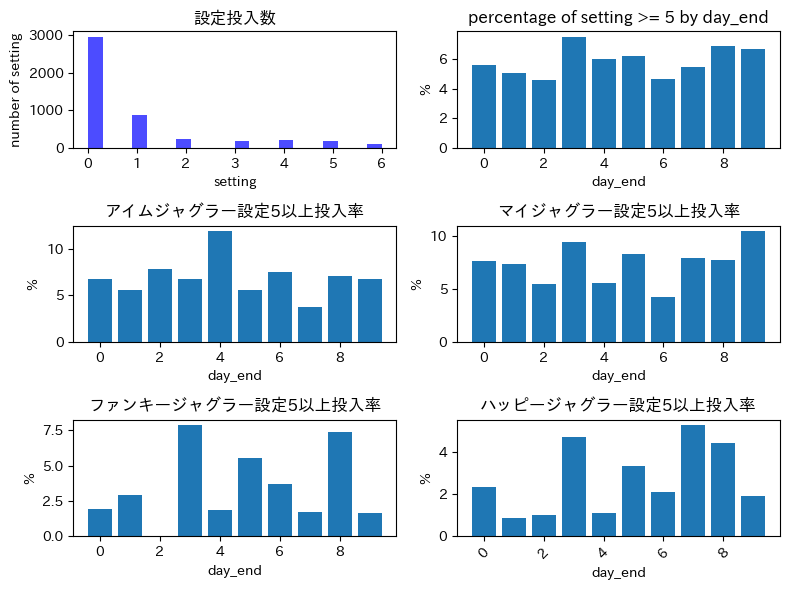

In [55]:
import pandas as pd
from matplotlib import pyplot as plt
import japanize_matplotlib
pd.set_option('display.max_rows', 10000)
shop_name="A"
main_data=pd.read_csv(f"CSV一覧/{shop_name}.csv", encoding="shift-jis")

#分数を変換
main_data['合成確率'] = main_data['合成確率'] .str.replace('1/','')
main_data['合成確率']=main_data['合成確率'].astype('float64')
main_data['BB確率'] = main_data['BB確率'] .str.replace('1/','')
main_data['BB確率']=main_data['BB確率'].astype('float64')
main_data['RB確率'] = main_data['RB確率'] .str.replace('1/','')
main_data['RB確率']=main_data['RB確率'].astype('float64')

#一旦すべて設定１とする
main_data['setting'] = 1
#アイムジャグラー推定設定
main_data.loc[(main_data['RB確率'] <= 399.6) & (main_data['機種名']=="アイムジャグラーEX-TP"),'setting'] = 2
main_data.loc[(main_data['RB確率'] <= 331.0) & (main_data['機種名']=="アイムジャグラーEX-TP"),'setting'] = 3
main_data.loc[(main_data['RB確率'] <= 315.1) & (main_data['機種名']=="アイムジャグラーEX-TP"),'setting'] = 4
main_data.loc[(main_data['RB確率'] <= 255.0) & (main_data['機種名']=="アイムジャグラーEX-TP"),'setting'] = 5
main_data.loc[(main_data['RB確率'] <= 255.0) & (main_data['機種名']=="アイムジャグラーEX-TP") & (main_data["ブドウ確率"]<5.90),'setting'] = 6
main_data.loc[(main_data['G数'] < 4000),'setting'] = 0 #回転数が4000未満は設定0として扱う
#マイジャグラー推定設定
main_data.loc[(main_data['RB確率'] <= 385.5) & (main_data['機種名']=="マイジャグラーV")& ((main_data["ブドウ確率"]<=5.90)|(main_data["BB確率"]<=273.1)),'setting'] = 2
main_data.loc[(main_data['RB確率'] <= 336.1) & (main_data['機種名']=="マイジャグラーV")& ((main_data["ブドウ確率"]<=5.90)|(main_data["BB確率"]<=273.1)),'setting'] = 3
main_data.loc[(main_data['RB確率'] <= 290.0) & (main_data['機種名']=="マイジャグラーV")& ((main_data["ブドウ確率"]<=5.90)|(main_data["BB確率"]<=273.1)),'setting'] = 4
main_data.loc[(main_data['RB確率'] <= 268.6) & (main_data['機種名']=="マイジャグラーV")& ((main_data["ブドウ確率"]<=5.85)|(main_data["BB確率"]<=270.8)),'setting'] = 5
main_data.loc[(main_data['RB確率'] <= 229.1) & (main_data['機種名']=="マイジャグラーV")& ((main_data["ブドウ確率"]<=5.80)|(main_data["BB確率"]<=266.4)),'setting'] = 6
main_data.loc[(main_data['G数'] < 4000),'setting'] = 0 #回転数が4000未満は設定0として扱う
#ファンキージャグラー推定設定
main_data.loc[(main_data['RB確率'] <= 407.1) & (main_data['機種名']=="ファンキージャグラー2") & (main_data["ブドウ確率"]<=5.92),'setting'] = 2
main_data.loc[(main_data['RB確率'] <= 366.1) & (main_data['機種名']=="ファンキージャグラー2") & (main_data["ブドウ確率"]<=5.92),'setting'] = 3
main_data.loc[(main_data['RB確率'] <= 322.8) & (main_data['機種名']=="ファンキージャグラー2") & (main_data["ブドウ確率"]<=5.92),'setting'] = 4
main_data.loc[(main_data['RB確率'] <= 299.3) & (main_data['機種名']=="ファンキージャグラー2") & (main_data["ブドウ確率"]<=5.88),'setting'] = 5
main_data.loc[(main_data['RB確率'] <= 262.1) & (main_data['機種名']=="ファンキージャグラー2") & (main_data["ブドウ確率"]<=5.83),'setting'] = 6
main_data.loc[(main_data['G数'] < 4000),'setting'] = 0 #回転数が4000未満は設定0として扱う
#ハッピージャグラー推定設定
main_data.loc[(main_data['RB確率'] <= 362.08) & (main_data['機種名']=="ハッピージャグラーVIII") & (main_data["ブドウ確率"]<=6.04),'setting'] = 2
main_data.loc[(main_data['RB確率'] <= 332.67) & (main_data['機種名']=="ハッピージャグラーVIII") & (main_data["ブドウ確率"]<=6.04),'setting'] = 3
main_data.loc[(main_data['RB確率'] <= 300.62) & (main_data['機種名']=="ハッピージャグラーVIII") & (main_data["ブドウ確率"]<=6.04),'setting'] = 4
main_data.loc[(main_data['RB確率'] <= 273.07) & (main_data['機種名']=="ハッピージャグラーVIII") & (main_data["ブドウ確率"]<=6.01),'setting'] = 5
main_data.loc[(main_data['RB確率'] <= 256.00) & (main_data['機種名']=="ハッピージャグラーVIII") & (main_data["ブドウ確率"]<=5.98),'setting'] = 6
main_data.loc[(main_data['G数'] < 4000),'setting'] = 0 #回転数が4000未満は設定0として扱う

#時刻データに変換
main_data['日付'] = pd.to_datetime(main_data['日付'])
main_data['day_end'] = main_data['日付'].astype(str).str[-1].astype(int) #日付末尾


# 前日の差枚、G数、BB確率、RB確率を計算して新しい列に追加
main_data['前日の差枚'] = main_data.groupby("台番号")['差枚'].shift(-1)
main_data['前日のG数'] = main_data.groupby("台番号")['G数'].shift(-1)
main_data['前日のBB確率'] = main_data.groupby("台番号")['BB確率'].shift(-1)
main_data['前日のRB確率'] = main_data.groupby("台番号")['RB確率'].shift(-1)
main_data.to_csv(f"{shop_name}-update.csv", index=False, encoding = "shift-jis")

#設定の比率
n_target0, n_target1,n_target2,n_target3,n_target4,n_target5,n_target6= len(main_data[main_data['setting'] == 0]), len(main_data[main_data['setting'] == 1]) , len(main_data[main_data['setting'] == 2]), len(main_data[main_data['setting'] == 3]), len(main_data[main_data['setting'] == 4]), len(main_data[main_data['setting'] == 5]), len(main_data[main_data['setting'] == 6])
n_all = n_target0+n_target1+n_target2+n_target3+n_target4+n_target5+n_target6
print('回転数不足 の割合 :', n_target0/n_all) # target0の割合
print('設定1 の割合 :', n_target1/n_all) # target1の割合
print('設定2 の割合 :', n_target2/n_all) # target2の割合
print('設定3 の割合 :', n_target3/n_all) # target3の割合
print('設定4 の割合 :', n_target4/n_all) # target4の割合
print('設定5 の割合 :', n_target5/n_all) # target5の割合
print('設定6 の割合 :', n_target6/n_all) # target6の割合

# サブプロットを配置
fig, axes = plt.subplots(3, 2, figsize=(8, 6))

# ヒストグラムを作成し配置
axes[0, 0].hist(main_data["setting"], bins=20, color='blue', alpha=0.7)
axes[0, 0].set_xlabel("setting")
axes[0, 0].set_ylabel("number of setting")
axes[0, 0].set_title("設定投入数")

#全データの中で設定5以上の投入率を調べる
# "setting" 列が5以上の行を抽出
setting_upperfive_df = main_data[main_data['setting'] >= 5]
# "day_end" 列ごとに条件を満たす行の数を計算
upperfize_by_day = setting_upperfive_df.groupby('day_end')['setting'].count()
all_by_day = main_data.groupby('day_end')['setting'].count()

percentage_by_day = upperfize_by_day*100/all_by_day
# バーの位置を設定
x = range(len(percentage_by_day))

# バーの高さを設定
y = percentage_by_day.values
axes[0, 1].bar(x, y)
axes[0, 1].set_xlabel('day_end')
axes[0, 1].set_ylabel("%")
axes[0, 1].set_title('percentage of setting >= 5 by day_end')
plt.xticks(rotation=45)  # X軸のラベルを回転させて可読性を向上させる

#アイムジャグラーの高設定投入率を調べる
im_all_df = main_data[main_data["機種名"]=="アイムジャグラーEX-TP"]
im_upperfive_df = im_all_df[im_all_df["setting"]>=5]

upperfize_by_day = im_upperfive_df.groupby('day_end')['setting'].count()
all_by_day = im_all_df.groupby('day_end')['setting'].count()

percentage_by_day =upperfize_by_day*100/all_by_day
# バーの位置を設定
x = range(len(percentage_by_day))

# バーの高さを設定
y = percentage_by_day.values
axes[1, 0].bar(x, y)
axes[1, 0].set_xlabel('day_end')
axes[1, 0].set_ylabel("%")
axes[1, 0].set_title('アイムジャグラー設定5以上投入率')

#マイジャグラーの高設定投入率を調べる
my_all_df = main_data[main_data["機種名"]=="マイジャグラーV"]
my_upperfive_df = my_all_df[my_all_df["setting"]>=5]

upperfize_by_day = my_upperfive_df.groupby('day_end')['setting'].count()
all_by_day = my_all_df.groupby('day_end')['setting'].count()

percentage_by_day =upperfize_by_day*100/all_by_day
# バーの位置を設定
x = range(len(percentage_by_day))

# バーの高さを設定
y = percentage_by_day.values
axes[1, 1].bar(x, y)
axes[1, 1].set_xlabel('day_end')
axes[1, 1].set_ylabel("%")
axes[1, 1].set_title('マイジャグラー設定5以上投入率')

#ファンキージャグラーの高設定投入率を調べる
fanky_all_df = main_data[main_data["機種名"]=="ファンキージャグラー2"]
fanky_upperfive_df = fanky_all_df[fanky_all_df["setting"]>=5]

upperfize_by_day = fanky_upperfive_df.groupby('day_end')['setting'].count()
all_by_day = fanky_all_df.groupby('day_end')['setting'].count()

percentage_by_day =upperfize_by_day*100/all_by_day

# バーの位置を設定
x = range(len(percentage_by_day))

# バーの高さを設定
y = percentage_by_day.values
axes[2, 0].bar(x, y)
axes[2, 0].set_xlabel('day_end')
axes[2, 0].set_ylabel("%")
axes[2, 0].set_title('ファンキージャグラー設定5以上投入率')

#ハッピージャグラーの高設定投入率を調べる
happy_all_df = main_data[main_data["機種名"]=="ハッピージャグラーVIII"]
happy_upperfive_df = happy_all_df[happy_all_df["setting"]>=5]

upperfize_by_day = happy_upperfive_df.groupby('day_end')['setting'].count()
all_by_day = happy_all_df.groupby('day_end')['setting'].count()

percentage_by_day =upperfize_by_day*100/all_by_day
# バーの位置を設定
x = range(len(percentage_by_day))

# バーの高さを設定
y = percentage_by_day.values
axes[2, 1].bar(x, y)
axes[2, 1].set_xlabel('day_end')
axes[2, 1].set_ylabel("%")
axes[2, 1].set_title('ハッピージャグラー設定5以上投入率')
# サブプロット間の横方向のスペースを調整
plt.subplots_adjust(wspace=0.3)  # 各サブプロット間のスペースを調整
# サブプロット間のスペースを調整
plt.tight_layout()

# 図を保存
plt.savefig(f'{shop_name}.png', dpi=300)
plt.show()



# zero_by_day.plot(kind='bar', xlabel='day_end', ylabel='Count', title='Count of setting = 0 by day_end')
# plt.xticks(rotation=45)  # X軸のラベルを回転させて可読性を向上させる
# plt.show()

In [56]:
import openpyxl
from openpyxl.styles import PatternFill

# カラムの制限をなくす（全てのカラムを表示）
pd.set_option('display.max_columns', None)

# 日付の末尾がイベ日である行を抽出
target_dates = main_data[main_data['day_end'] == 5]['日付']
my_df = main_data[main_data['機種名'] == "アイムジャグラーEX-TP"]
filtered_my_df = my_df[my_df['日付'].isin(target_dates) | my_df['日付'].isin(target_dates - pd.DateOffset(
    days=1)) | my_df['日付'].isin(target_dates - pd.DateOffset(days=2)) | my_df['日付'].isin(target_dates - pd.DateOffset(days=3))]
filtered_my_df_event = my_df[my_df['日付'].isin(target_dates)]

#日付を変更する際の注意を解消するためにコピーを作成
my_df = my_df.copy()
filtered_my_df = filtered_my_df.copy()
filtered_my_df_event = filtered_my_df_event.copy()
(
        writer, sheet_name = '全データのREG確率', index=True)
my_df['日付'] = my_df['日付'].dt.strftime('%Y年%m月%d日(%a)')
filtered_my_df['日付'] = filtered_my_df['日付'].dt.strftime('%Y年%m月%d日(%a)')
filtered_my_df_event['日付'] = filtered_my_df_event['日付'].dt.strftime('%Y年%m月%d日(%a)')

pivot_table_all_samai = my_df.pivot_table(
    index = '日付', columns = '台番号', values = '差枚')

pivot_table_all_reg = my_df.pivot_table(
    index = '日付', columns = '台番号', values = 'RB確率')

display(my_df)
pivot_table_all_big_count=my_df.pivot_table(
    index = '日付', columns = '台番号', values = 'BB回数')
pivot_table_all_reg_count=my_df.pivot_table(
    index = '日付', columns = '台番号', values = 'RB回数')

pivot_table_all_gassan_count=pivot_table_all_big_count+pivot_table_all_reg_count

pivot_table_all_game_count= my_df.pivot_table(
    index = '日付', columns = '台番号', values = 'G数')

pivot_table_all_setting = my_df.pivot_table(
    index = '日付', columns = '台番号', values = 'setting')

pivot_table_sorted_all_setting = pivot_table_all_setting.sort_values(
    by = '日付', ascending = False)

pivot_table_sorted_all_samai = pivot_table_all_samai.sort_values(
    by = '日付', ascending = False)

pivot_table_sorted_all_reg =pivot_table_all_reg.sort_values(
    by = '日付', ascending = False)

pivot_table_sorted_all_gassan_count= pivot_table_all_gassan_count.sort_values(
    by = '日付', ascending = False)

pivot_table_sorted_all_game_count=pivot_table_all_game_count.sort_values(
    by = '日付', ascending = False)


pivot_table_all_with_totals = pivot_table_sorted_all_samai.copy()
pivot_table_all_with_totals.loc['合計'] = pivot_table_all_with_totals.sum()

pivot_table_samai = filtered_my_df.pivot_table(
    index = '日付', columns = '台番号', values = '差枚')

pivot_table_sorted_samai = pivot_table_samai.sort_values(
    by = '日付', ascending = False)

pivot_table_samai_event = filtered_my_df_event.pivot_table(
    index = '日付', columns = '台番号', values = '差枚')
pivot_table_sorted_samai_event = pivot_table_samai_event.sort_values(
    by = '日付', ascending = False)

pivot_table_event_with_totals = pivot_table_sorted_samai_event.copy()
pivot_table_event_with_totals.loc['合計'] = pivot_table_event_with_totals.sum()

pivot_table_game_count = filtered_my_df.pivot_table(
    index = '日付', columns = '台番号', values = 'G数')
pivot_table_sorted_game_count = pivot_table_game_count.sort_values(
    by = '日付', ascending = False)

pivot_table_gassan = filtered_my_df.pivot_table(
    index = '日付', columns = '台番号', values = '合成確率')
pivot_table_sorted_gassan = pivot_table_gassan.sort_values(
    by = '日付', ascending = False)

pivot_table_reg = filtered_my_df.pivot_table(
    index = '日付', columns = '台番号', values = 'RB確率')
pivot_table_sorted_reg = pivot_table_reg.sort_values(by='日付', ascending=False)

pivot_table_setting = filtered_my_df.pivot_table(
    index = '日付', columns = '台番号', values = 'setting')
pivot_table_sorted_setting = pivot_table_setting.sort_values(
    by = '日付', ascending = False)

pivot_table_setting_event = filtered_my_df_event.pivot_table(
    index = '日付', columns = '台番号', values = 'setting')
pivot_table_sorted_setting_event = pivot_table_setting_event.sort_values(
    by = '日付', ascending = False)
pivot_table_sorted_setting_event = pd.DataFrame(
    pivot_table_sorted_setting_event)
display(pivot_table_sorted_setting_event)
setting = 5
count_of_values_above_condition = pivot_table_sorted_setting_event.applymap(
    lambda x: 1 if x >= setting else 0).sum()
# print(type(count_of_values_above_condition))
# 新しい行を追加
pivot_table_sorted_setting_event = pd.concat(
    [pivot_table_sorted_setting_event, count_of_values_above_condition.to_frame().T], ignore_index = False)
pivot_table_sorted_setting_event.index = pivot_table_sorted_setting_event.index.to_list()[
    : -1] + ['高設定数']

# Excelファイルに保存
with pd.ExcelWriter(f'{shop_name}-data.xlsx', engine='openpyxl') as writer:
    pivot_table_sorted_all_samai.to_excel(
        writer, sheet_name = '全データの差枚', index = True)
    pivot_table_sorted_all_setting.to_excel(
        writer, sheet_name = '全データの設定', index = True)
    pivot_table_sorted_all_reg.to_excel(
        writer, sheet_name = '全データのREG確率', index=True)
    pivot_table_sorted_all_gassan_count.to_excel(
        writer, sheet_name = '全データのボーナス合算回数', index=True)
    pivot_table_sorted_all_game_count.to_excel(
        writer, sheet_name = '全データのG数', index=True)

    filtered_my_df.to_excel(writer, sheet_name='三日前まで含めた全項目データ', index=False)

    pivot_table_event_with_totals.to_excel(
        writer, sheet_name = 'eventのみの差枚', index = True)
    pivot_table_sorted_setting_event.to_excel(
        writer, sheet_name = 'eventのみの設定', index = True)

    pivot_table_sorted_samai.to_excel(
        writer, sheet_name = '三日前まで含めた差枚', index = True)

    pivot_table_sorted_game_count.to_excel(
        writer, sheet_name = '三日前まで含めたG数', index = True)

    pivot_table_sorted_reg.to_excel(
        writer, sheet_name = '三日前まで含めたRB確率', index = True)

    pivot_table_sorted_gassan.to_excel(
        writer, sheet_name = '三日前まで含めた合算確率', index = True)

    pivot_table_sorted_setting.to_excel(
        writer, sheet_name = '三日前まで含めたsetting', index = True)

    workbook = writer.book
    worksheet_all_samai = writer.sheets['全データの差枚']
    worksheet_all_reg = writer.sheets['全データのREG確率']
    worksheet_all_gassan_count= writer.sheets['全データのボーナス合算回数']
    worksheet_all_game_count= writer.sheets['全データのG数']
    worksheet_all_setting = writer.sheets['全データの設定']
    worksheet_setting = writer.sheets['三日前まで含めたsetting']
    worksheet_samai = writer.sheets['三日前まで含めた差枚']
    worksheet_game_count = writer.sheets['三日前まで含めたG数']
    worksheet_reg_probability = writer.sheets['三日前まで含めたRB確率']
    worksheet_total_probability = writer.sheets['三日前まで含めた合算確率']
    worksheet_setting_event = writer.sheets['eventのみの設定']
    worksheet_samai_event = writer.sheets['eventのみの差枚']

    # 値が5以上のセルを赤く塗りつぶす
    red_fill = PatternFill(start_color='FFFF0000',
                           end_color = 'FFFF0000', fill_type = 'solid')
    # 全データ
    for cell in worksheet_all_setting.iter_rows(min_row=2, min_col=2, max_row=len(pivot_table_sorted_all_setting) + 1, max_col=len(pivot_table_sorted_all_setting.columns) + 1):
        for cell in cell:
            if isinstance(cell.value, (int, float)) and cell.value >= 5:
                cell.fill = red_fill
                high_setting_row, high_setting_column = cell.row, cell.column
                worksheet_all_samai.cell(high_setting_row, high_setting_column).fill = red_fill
                worksheet_all_reg.cell(high_setting_row, high_setting_column).fill = red_fill
                worksheet_all_game_count.cell(
                    high_setting_row, high_setting_column).fill = red_fill
                worksheet_all_gassan_count.cell(
                    high_setting_row, high_setting_column).fill = red_fill

    # イベントの三日前まで含めた
    for cell in worksheet_setting.iter_rows(min_row=2, min_col=2, max_row=len(pivot_table_setting) + 1, max_col=len(pivot_table_sorted_setting.columns) + 1):
        for cell in cell:
            if isinstance(cell.value, (int, float)) and cell.value >= 5:
                cell.fill = red_fill
                high_setting_row, high_setting_column = cell.row, cell.column
                worksheet_samai.cell(
                    high_setting_row, high_setting_column).fill = red_fill
                worksheet_game_count.cell(
                    high_setting_row, high_setting_column).fill = red_fill
                worksheet_reg_probability.cell(
                    high_setting_row, high_setting_column).fill = red_fill
                worksheet_total_probability.cell(
                    high_setting_row, high_setting_column).fill = red_fill
                

    # イベントのみ
    for cell in worksheet_setting_event.iter_rows(min_row=2, min_col=2, max_row=len(pivot_table_setting) + 1, max_col=len(pivot_table_sorted_setting_event.columns) + 1):
        for cell in cell:
            if isinstance(cell.value, (int, float)) and cell.value >= 5:
                cell.fill = red_fill
                high_setting_row, high_setting_column = cell.row, cell.column
                worksheet_samai_event.cell(
                    high_setting_row, high_setting_column).fill = red_fill


# pivot_table_sorted_setting.to_csv(f"{shop_name}-setting.csv", encoding="shift-jis")


,日付,機種名,台番号,G数,差枚,BB回数,RB回数,合成確率,BB確率,RB確率,ブドウ確率,setting,day_end,前日の差枚,前日のG数,前日のBB確率,前日のRB確率
0,2023年09月16日(Sat),アイムジャグラーEX-TP,25,5450,-1551,17,10,201.9,320.6,545.0,6.224486,1,6,-389.0,5798.0,252.1,527.1
1,2023年09月16日(Sat),アイムジャグラーEX-TP,26,6111,1521,32,11,142.1,191.0,555.5,6.201060,1,6,-763.0,7169.0,311.7,298.7
2,2023年09月16日(Sat),アイムジャグラーEX-TP,27,7963,768,29,35,124.4,274.6,227.5,6.196277,5,6,1568.0,8343.0,260.7,287.7
3,2023年09月16日(Sat),アイムジャグラーEX-TP,28,7955,-1377,17,36,150.1,467.9,221.0,5.766825,6,6,-1223.0,4595.0,328.2,459.5
4,2023年09月16日(Sat),アイムジャグラーEX-TP,30,5274,-131,22,14,146.5,239.7,376.7,6.652414,2,6,1978.0,6959.0,198.8,463.9
5,2023年09月16日(Sat),アイムジャグラーEX-TP,31,6328,159,23,20,147.2,275.1,316.4,5.973715,3,6,-475.0,5288.0,330.5,293.8
6,2023年09月16日(Sat),アイムジャグラーEX-TP,32,8539,1869,35,36,120.3,244.0,237.2,6.079974,5,6,3105.0,6620.0,183.9,315.2
22,2023年09月09日(Sat),アイムジャグラーEX-TP,25,5798,-389,23,11,170.5,252.1,527.1,6.231310,1,9,-1174.0,2927.0,325.2,731.8
23,2023年09月09日(Sat),アイムジャグラーEX-TP,26,7169,-763,23,24,152.5,311.7,298.7,6.168357,4,9,2565.0,8286.0,251.1,212.5
24,2023年09月09日(Sat),アイムジャグラーEX-TP,27,8343,1568,32,29,136.8,260.7,287.7,5.627882,4,9,1318.0,8482.0,265.1,235.6


台番号,25,26,27,28,30,31,32
日付,,,,,,,
2023年08月05日(Sat),4,2,2,3,0,2,6
2023年05月25日(Thu),1,0,2,0,0,0,0
2023年05月15日(Mon),0,0,4,0,0,0,0
2023年05月05日(Fri),0,1,0,0,0,4,0
2023年04月25日(Tue),0,1,0,0,3,0,4
2023年04月15日(Sat),4,4,1,4,1,1,2
2023年04月05日(Wed),0,4,0,0,5,0,0
2023年03月25日(Sat),1,1,4,2,3,4,0
2023年03月15日(Wed),4,0,0,0,0,0,0


## 機械学習

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit
#特徴量作成
main_data['year'] = main_data['日付'].dt.year #年度
main_data['month'] = main_data['日付'].dt.month #月
main_data['day'] = main_data['日付'].dt.day #日
main_data['weekday'] = main_data['日付'].dt.weekday #曜日
main_data['day_end_2'] = main_data['日付'].astype(str).str[-2].astype(int) #日付2桁目
main_data['day_zoro'] = 0
main_data.loc[main_data['day_end']==main_data['day_end_2'],'day_zoro'] = 1 #ゾロ目を１とする

main_data['machine_end'] = main_data['台番号'].astype(str).str[-1].astype(int) #台番号末尾
main_data['machine_end_2'] = main_data['台番号'].astype(str).str[-2].astype(int) #台番号2桁目
main_data['machine_zoro'] = 0
main_data.loc[main_data['machine_end']==main_data['machine_end_2'],'machine_zoro'] = 1 #台番号ゾロ目を１とする
#設定0を削除してみる
main_data = main_data[main_data['setting'] != 0]
X = main_data.drop(['setting','日付'],axis=1).values
y = main_data['setting'].values
columns_name = main_data.drop(['setting','日付'],axis=1).columns
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0) 

def data_split(X,y):
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
    X_train = pd.DataFrame(X_train, columns=columns_name)
    X_test = pd.DataFrame(X_test, columns=columns_name)

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = data_split(X, y)
X_train, y_train, X_val, y_val = data_split(X_train.values, y_train)

print("train shape", X_train.shape)
print("test shape", X_test.shape)
print("validation shape", X_val.shape)
print(X_train.columns, X_test.columns)
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(y_train)

plt.subplot(1,3,2)
plt.hist(y_test)

plt.subplot(1,3,3)
plt.hist(y_val)

ValueError: cannot convert float NaN to integer

Index(['機種名', '台番号', 'year', 'month', 'day', 'weekday', 'day_end', 'day_end_2',
       'day_zoro', 'machine_end', 'machine_end_2', 'machine_zoro', '前日の差枚',
       '前日のG数', '前日のBB確率', '前日のRB確率'],
      dtype='object')
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1167
[LightGBM] [Info] Number of data points in the train set: 2141, number of used features: 16
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -0.632880
[LightGBM] [Info] Start training from score -1.860886
[LightGBM] [Info] Start training from score -2.406338
[LightGBM] [Info] Start training from score -1.945443
[LightGBM] [Info] Start training from score -2.786226
[LightGBM] [Info] Start training from score -3.980149


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

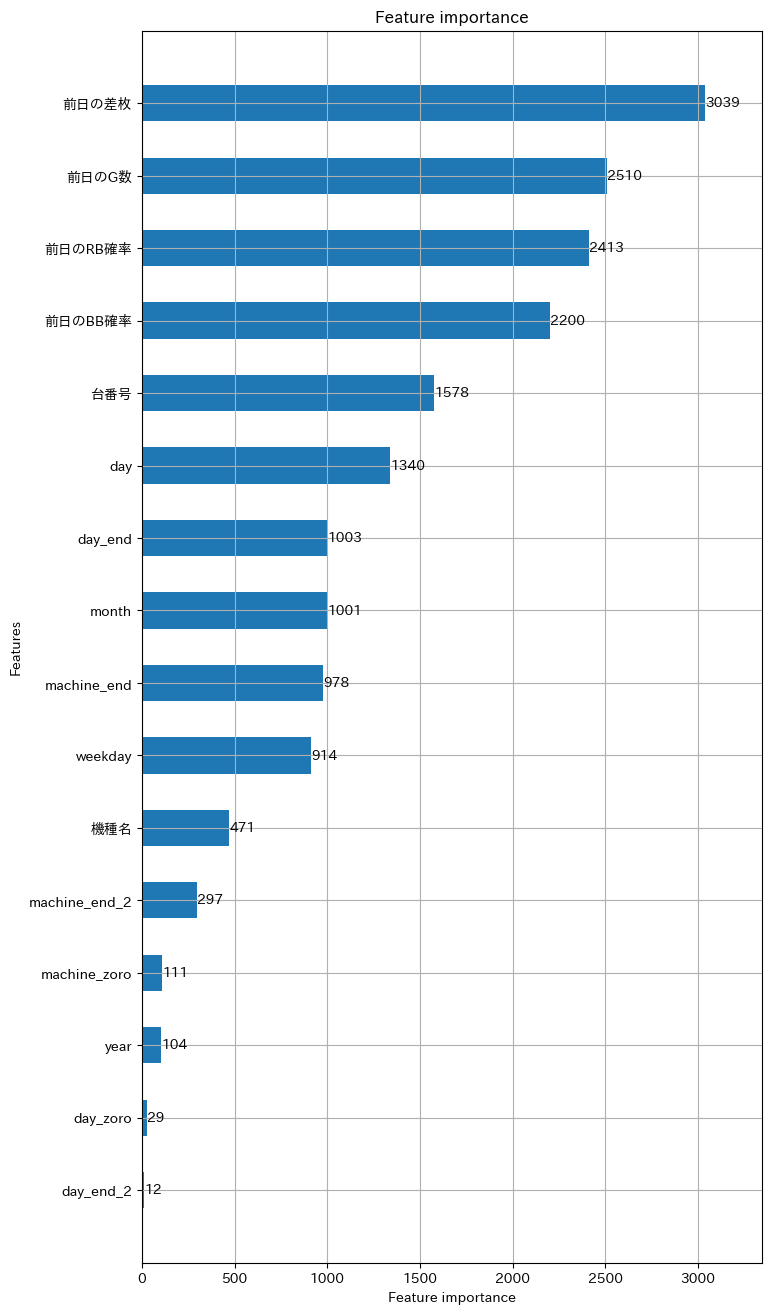

In [5]:
import lightgbm as lgb
import numpy as np
from matplotlib import pyplot as plt
import japanize_matplotlib
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

X_train = X_train.drop(['G数','差枚', '合成確率', 'BB確率', 'RB確率', 'BB回数', 'RB回数', 'ブドウ確率'],axis=1)
X_test = X_test.drop(['G数','差枚', '合成確率', 'BB確率', 'RB確率', 'BB回数', 'RB回数', 'ブドウ確率'],axis=1)
print(X_train.columns)
# 文字列と数値の対応を定義した辞書
mapping = {'アイムジャグラーEX-TP': 1, 'マイジャグラーV': 2, 'ファンキージャグラー2': 3, 'ハッピージャグラーVIII': 4}

#lightgbmを行うために各objectをint、floatに変換
for column in X_train.columns:
    if column=="機種名":
        # '機種名' 列をマップして置き換え
        X_train[column] = X_train[column].map(mapping)
        X_test[column] = X_test[column].map(mapping)
    if column in ['台番号', 'G数', '差枚', 'BB', 'RB', 'year', 'month', 'day', 'weekday', 'day_end', 'day_end_2', 'day_zoro',
       'machine_end', 'machine_end_2', 'machine_zoro', '前日の差枚', '前日のG数']:
        X_train[column] = X_train[column].astype(float)
        X_test[column] = X_test[column].astype(float)
    else:
        X_train[column] = X_train[column].astype(float)
        X_test[column] = X_test[column].astype(float)
y_train = y_train.astype(int)
y_test = y_test.astype(int)
# X_train["差枚"]=X_train["差枚"].astype(int)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

lgb_params = {
             'task': 'train',
             'boosting_type': 'gbdt',
             'objective': 'multiclass', # 目的 : 多クラス分類 
             'num_class': 7, # クラス数 : 7
             'metric': {'multi_error'}, # 評価指標 : 誤り率(= 1-正答率) # 他には'multi_logloss'など
             
             }


model = lgb.train(lgb_params,
                 train_set=lgb_train, # トレーニングデータの指定
                 valid_sets=lgb_eval, # 検証データの指定
                 )

# テストデータの予測 ((各クラスの予測確率 を返す))
y_pred_prob = model.predict(X_test)
# テストデータの予測 (予測クラスを返す)
y_pred = np.argmax(y_pred_prob, axis=1) # 一番大きい予測確率のクラスを予測クラスに


lgb.plot_importance(model, height=0.5, figsize=(8,16))

In [6]:
# 真値と予測値の表示
df_pred = pd.DataFrame({'target':y_test,'target_pred':y_pred})
display(df_pred)

# 真値と予測確率の表示
df_pred_prob = pd.DataFrame({'y':y_test, 'target0_prob':y_pred_prob[:,0], 'target1_prob':y_pred_prob[:,1], 'target2_prob':y_pred_prob[:,2], 'target3_prob':y_pred_prob[:,3]
                            , 'target4_prob':y_pred_prob[:,4], 'target5_prob':y_pred_prob[:,5], 'target6_prob':y_pred_prob[:,6]})
display(df_pred_prob)


,target,target_pred
0,1,1
1,1,1
2,3,1
3,1,1
4,1,1
5,2,2
6,2,1
7,4,2
8,1,1
9,3,3


,y,target0_prob,target1_prob,target2_prob,target3_prob,target4_prob,target5_prob,target6_prob
0,1,7.612207e-16,0.853109,0.104030,0.039821,0.001210,0.001722,1.081402e-04
1,1,1.599846e-15,0.533610,0.150363,0.296357,0.002067,0.016868,7.340756e-04
2,3,8.616459e-16,0.965166,0.021379,0.005039,0.008041,0.000360,1.571233e-05
3,1,8.028163e-16,0.869159,0.096106,0.016518,0.017996,0.000198,2.329429e-05
4,1,1.122617e-15,0.861707,0.082614,0.014841,0.038331,0.002489,1.685999e-05
5,2,1.566277e-15,0.176620,0.509558,0.005131,0.204563,0.103617,5.111454e-04
6,2,5.926151e-16,0.944036,0.032396,0.012644,0.010718,0.000194,1.141959e-05
7,4,1.592108e-15,0.155287,0.521723,0.026256,0.245541,0.023706,2.748729e-02
8,1,1.203127e-15,0.661036,0.163408,0.147532,0.002563,0.025447,1.384218e-05
9,3,2.399561e-15,0.073070,0.336063,0.388865,0.127149,0.073748,1.106364e-03


In [7]:
# モデル評価
# acc : 正答率
acc = accuracy_score(y_test,y_pred)
print('Acc :', acc)

Acc : 0.5477611940298508


In [167]:
from bs4 import BeautifulSoup

html = '''
<div class="table-row">
<div class="table-data-cell"><a href="https://ana-slo.com/%e3%83%9b%e3%83%bc%e3%83%ab%e3%83%87%e3%83%bc%e3%82%bf/%e5%85%b5%e5%ba%ab%e7%9c%8c/123%e4%b8%89%e6%9c%a8%e5%ba%97-%e3%83%87%e3%83%bc%e3%82%bf%e4%b8%80%e8%a6%a7/">123三木店</a></div>
<div class="table-data-cell">三木市</div>
</div>
'''

# BeautifulSoupでHTMLを解析
soup = BeautifulSoup(html, 'html.parser')
print(soup)
# 1つ目の<div>内の<a>タグのテキストを取得
first_div_text = soup.find('div', class_='table-row').find('div', class_='table-data-cell').a.text

# 2つ目の<div>内のテキストを取得
second_div_text = soup.find('div', class_='table-row').find_all('div', class_='table-data-cell')[1].text

# 結果を出力
print("1つ目の<div>内の<a>タグのテキスト:", first_div_text)
print("2つ目の<div>内のテキスト:", second_div_text)



<div class="table-row">
<div class="table-data-cell"><a href="https://ana-slo.com/%e3%83%9b%e3%83%bc%e3%83%ab%e3%83%87%e3%83%bc%e3%82%bf/%e5%85%b5%e5%ba%ab%e7%9c%8c/123%e4%b8%89%e6%9c%a8%e5%ba%97-%e3%83%87%e3%83%bc%e3%82%bf%e4%b8%80%e8%a6%a7/">123三木店</a></div>
<div class="table-data-cell">三木市</div>
</div>

1つ目の<div>内の<a>タグのテキスト: 123三木店
2つ目の<div>内のテキスト: 三木市


In [182]:
!pip install openpyxl


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 5.3 MB/s eta 0:00:00a 0:00:01
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for autopep8 from https://files.pythonhosted.org/packages/d8/f2/e63c9f9c485cd90df8e4e7ae90fa3be2469c9641888558c7b45fa98a76f8/autopep8-2.0.4-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 2.2 MB/s eta 0:00:00
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
